# London House Price Data Machine Learning Project  

The point of this notebook is to expand on my supervised machine learning regression into a Kaggle dataset.



## 1 Import packages

The first thing that I need to do is import all of the relevant packages that I will need to complete this problem.

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils import *
from sklearn.model_selection import train_test_split
import copy
import math
%matplotlib inline


# Define the problem

Firstly I want to import, get brief descriptions about it and try to make sure that there is not any garbage

In [5]:
prices_raw = pd.read_csv('London.csv')
print(prices_raw.head())
print(prices_raw.describe())

   Unnamed: 0  Property Name    Price        House Type  Area in sq ft  \
0           0    Queens Road  1675000             House           2716   
1           1  Seward Street   650000  Flat / Apartment            814   
2           2    Hotham Road   735000  Flat / Apartment            761   
3           3   Festing Road  1765000             House           1986   
4           4   Spencer Walk   675000  Flat / Apartment            700   

   No. of Bedrooms  No. of Bathrooms  No. of Receptions     Location  \
0                5                 5                  5    Wimbledon   
1                2                 2                  2  Clerkenwell   
2                2                 2                  2       Putney   
3                4                 4                  4       Putney   
4                2                 2                  2       Putney   

  City/County Postal Code  
0      London    SW19 8NY  
1      London    EC1V 3PA  
2      London    SW15 1QL  
3      Lon

I am looking to focus initially on a price prediction model that focusses only on one variable.  Therefore, for my first pass at the data I will drop all columns except price and area.

In [7]:
price_area = prices_raw[['Price','Area in sq ft']]
print(price_area.head())

     Price  Area in sq ft
0  1675000           2716
1   650000            814
2   735000            761
3  1765000           1986
4   675000            700


I will also trim it in half to use a random sample as training data and the other as a prediciton tool.  I could also later try to compare it to random samples from Rightmove.


In [11]:
train, test = train_test_split(price_area,test_size= 0.5)
print(test.describe())
print(train.describe())

              Price  Area in sq ft
count  1.740000e+03    1740.000000
mean   1.875992e+06    1744.663793
std    2.218818e+06    1409.617798
min    2.499990e+05     274.000000
25%    7.750000e+05     863.000000
50%    1.250000e+06    1323.500000
75%    2.250000e+06    2173.750000
max    3.400000e+07   15405.000000
              Price  Area in sq ft
count  1.740000e+03    1740.000000
mean   1.852353e+06    1681.283333
std    2.315312e+06    1316.983445
min    1.800000e+05     292.000000
25%    7.187500e+05     812.750000
50%    1.195000e+06    1296.500000
75%    2.000000e+06    2149.250000
max    3.975000e+07   12435.000000


In [15]:
print(type(train))

<class 'pandas.core.frame.DataFrame'>


I think I need to convert the data to numpy arrays

In [21]:
x_train = train['Area in sq ft'].to_numpy()
y_train = train['Price'].to_numpy()

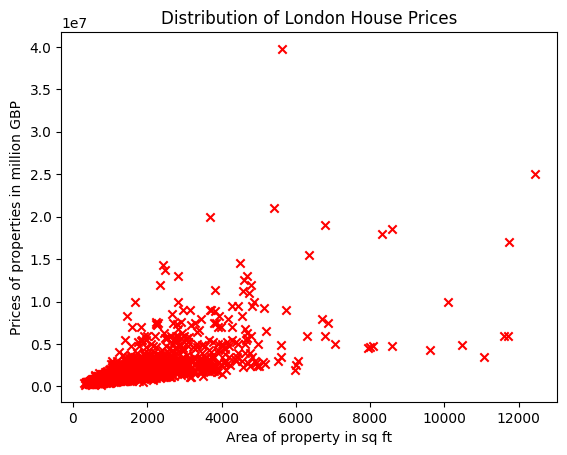

In [24]:
plt.scatter(x_train,y_train,marker = 'x', c='r')
plt.title('Distribution of London House Prices')
plt.ylabel('Prices of properties in million GBP')
plt.xlabel('Area of property in sq ft')
plt.show()